### CLUSTURENING ALGORITHM IMPLEMENATION_IRIS DATASET

### ANJALI L

### OVERVIEW:
## The Iris dataset is a classic benchmark dataset widely utilized in machine learning and statistical analysis. It consists of 150 observations of three species of Iris flowers: Iris-setosa, Iris-versicolor, and Iris-virginica. Each sample is described by four numerical features: sepal length, sepal width, petal length, and petal width, measured in centimeters. These features provide the physical characteristics of the flowers, enabling classification and clustering tasks.

## Source:
Introduced by Ronald A. Fisher in 1936 in his paper "The Use of Multiple Measurements in Taxonomic Problems."

### Features 
The dataset contains four numerical features representing physical measurements of flowers:

1.Sepal Length (cm): Length of the sepal in centimeters.
2.Sepal Width (cm): Width of the sepal in centimeters.
3.Petal Length (cm): Length of the petal in centimeters.
4.Petal Width (cm): Width of the petal in centimeters.



### Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

## IMPORTING LIBRARIES

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")# to prevent warning msgs

In [5]:
#COLLECTING DATA
data=load_iris()
X= pd.DataFrame(data.data,columns=data.feature_names)
y= pd.Series(data.target)

## BASIC INFORMATION AND STATISTICS:

In [7]:
print("Dataset Shape:",X) 
print("Target Distribution:")
print(y.value_counts(normalize=True))

Dataset Shape:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
Target Distribution:
0   

In [9]:
print("Basic Statistics:")
print(X.describe())

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## DATA VISUALIZATION

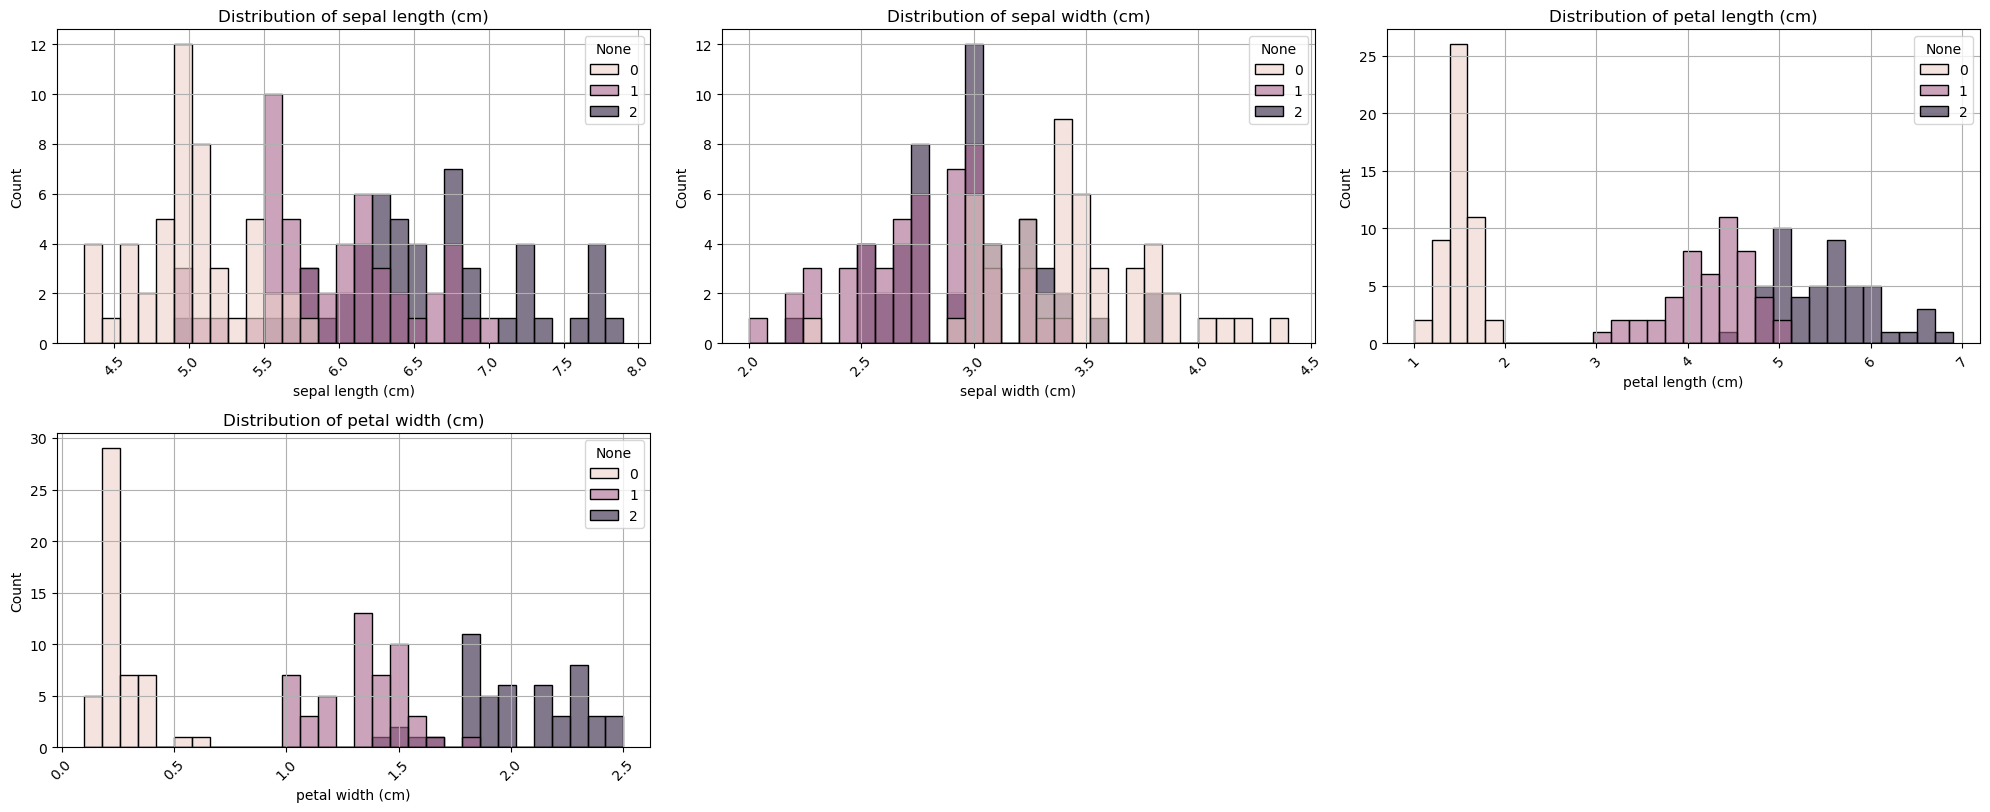

In [27]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=X, x=column, hue=y, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

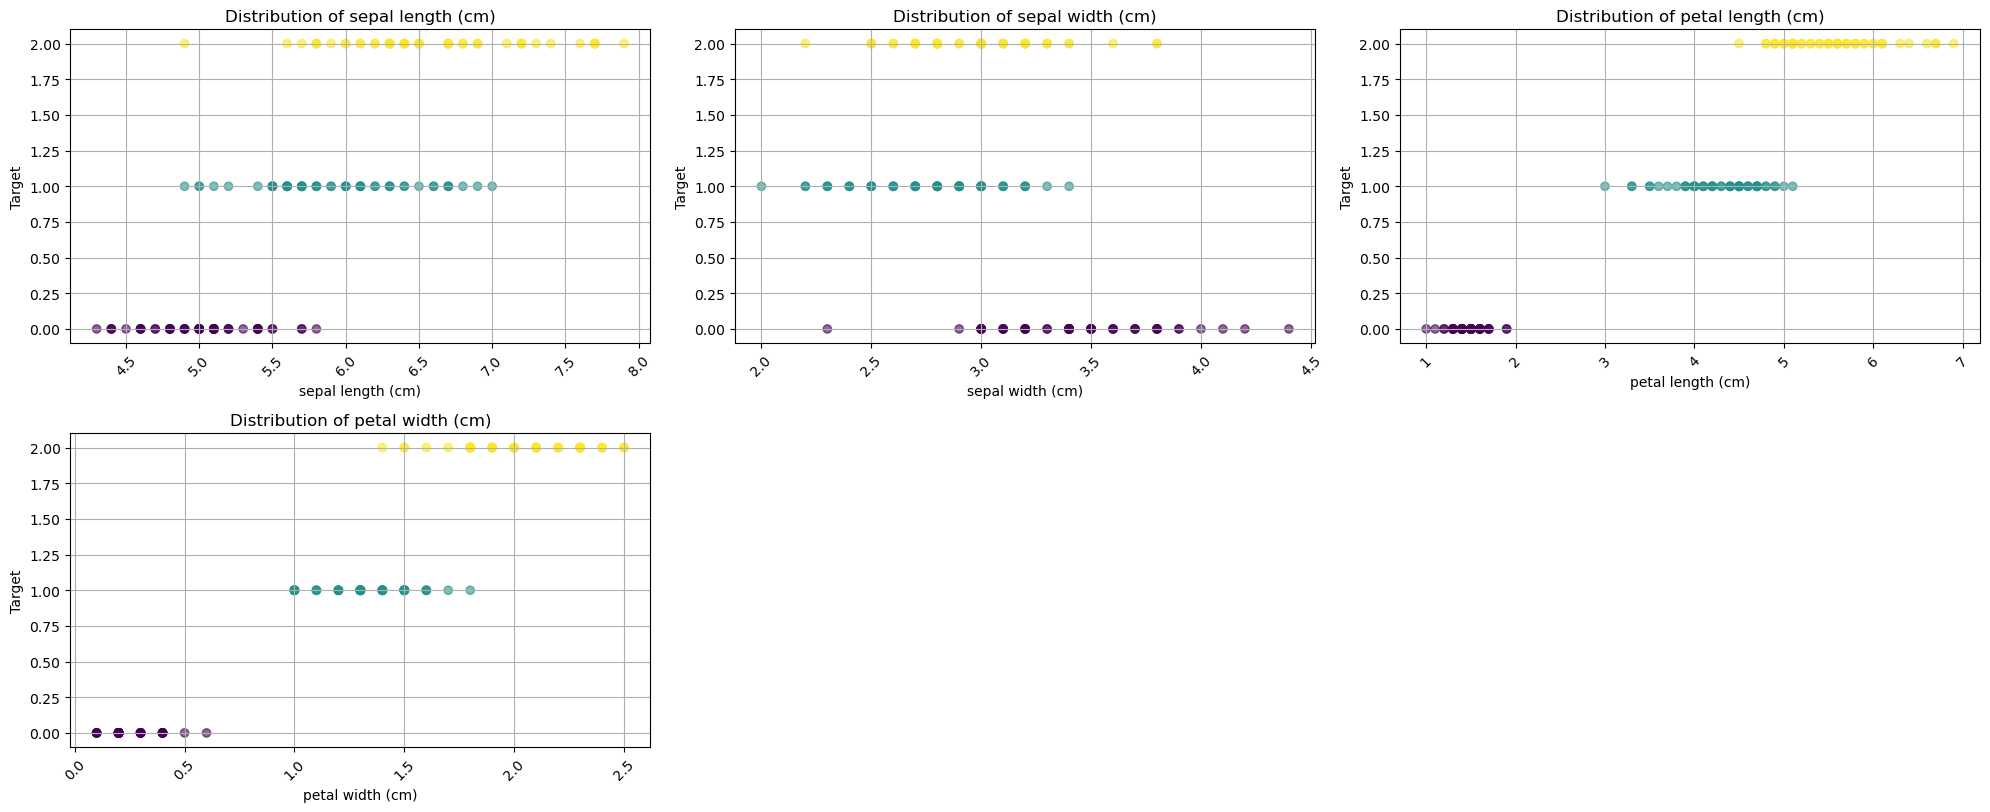

In [29]:

plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    plt.scatter(X[column], y, alpha=0.6, c=y, cmap='viridis')  # Scatter plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.grid(True)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Clustering Algorithm Implementation

## 1. KMeans Clustering 

## KMean Clustering
KMeans clustering is an unsupervised machine learning algorithm that groups data into 
𝑘
k clusters based on feature similarity. The algorithm works as follows:

1. Randomly select 
𝑘
k centroids (cluster centers).
2. Assign each data point to the nearest centroid based on distance (commonly Euclidean distance).
3. Recalculate the centroids as the mean of all points assigned to each cluster.
4. Iterate the assignment and update steps until the centroids stabilize or the maximum number of iterations is reached.

## Why KMeans Clustering is Suitable for the Iris Dataset?

The Iris dataset is ideal for demonstrating clustering as it has predefined species labels (ground truth), but clustering is performed without using these labels.
KMeans performs efficiently on the Iris dataset due to its small size and four numeric features.

In [39]:
km=KMeans(n_clusters=3) #Assuming 3 clusters
y_predicted=km.fit_predict(X)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [41]:
X['cluster']=y_predicted   #Add cluster labels to the dataset
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

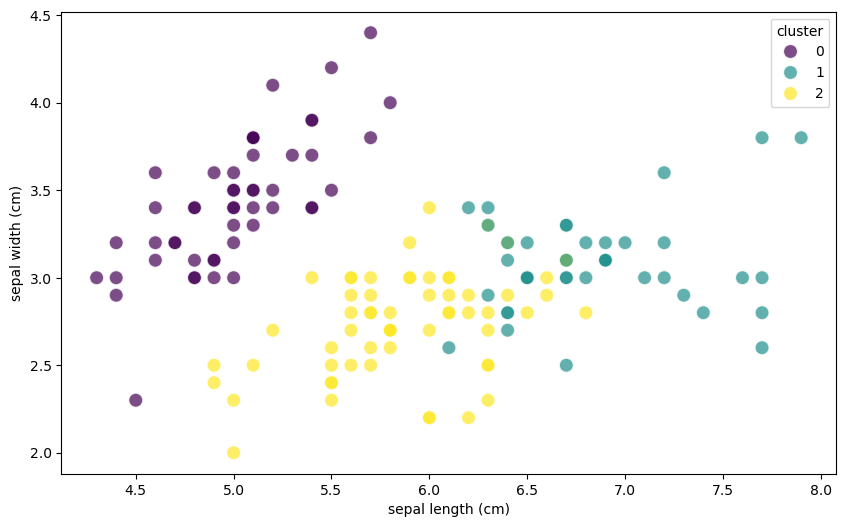

In [47]:
plt.figure(figsize=(10, 6)) # Visualization of Clusters (using the first two features for simplicity)
sns.scatterplot(
    x=X.iloc[:, 0], y=X.iloc[:, 1],
    hue=X['cluster'], palette='viridis',
    s=100, alpha=0.7
)

In [55]:
sse = []  #WCSS  Elbow Plot
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

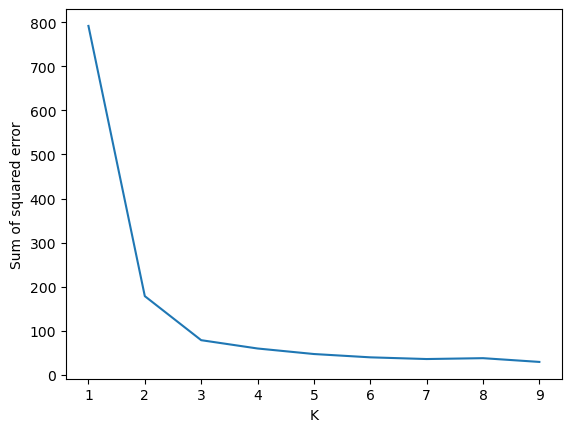

In [57]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [65]:

silhouette_avg = silhouette_score(X,y_predicted)

In [67]:
silhouette_avg  #0 and 1

0.6220342112834246

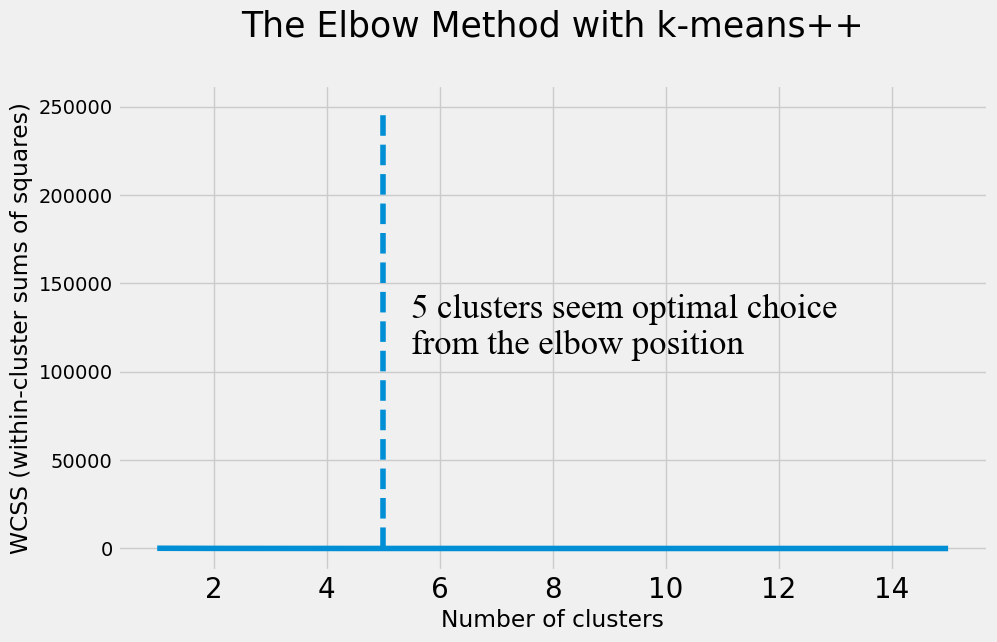

In [103]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

#### 2.Hierarchical Clustering
.

## Hierarchical Clustering Description:
Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters by either:

1.Agglomerative (Bottom-Up): Starts with each data point as its own cluster and successively merges the closest clusters until one cluster remains.
2.Divisive (Top-Down): Starts with all points in one cluster and successively splits them into smaller clusters.

## Explain why Hierarchical clustering might be suitable for the Iris dataset.
Unlike KMeans, the number of clusters doesn't need to be predefined. You can choose clusters by "cutting" the dendrogram at a desired level.
Dendrograms provide insight into how data points relate to each other and form clusters at different levels.



#### Hierarchical Clustering plotting

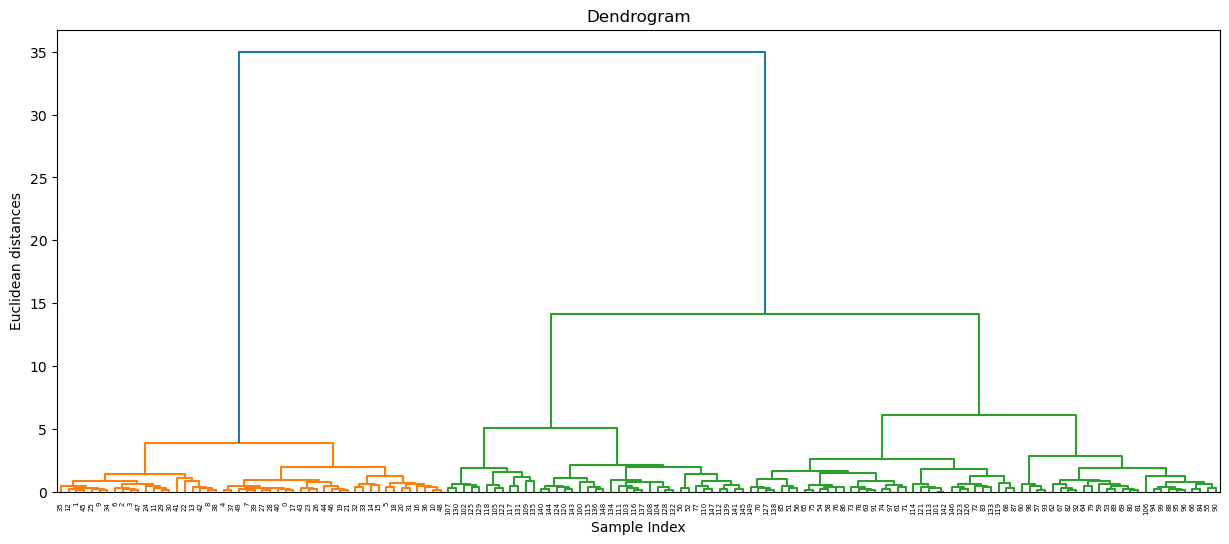

In [69]:
# Plot the dendrogram

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

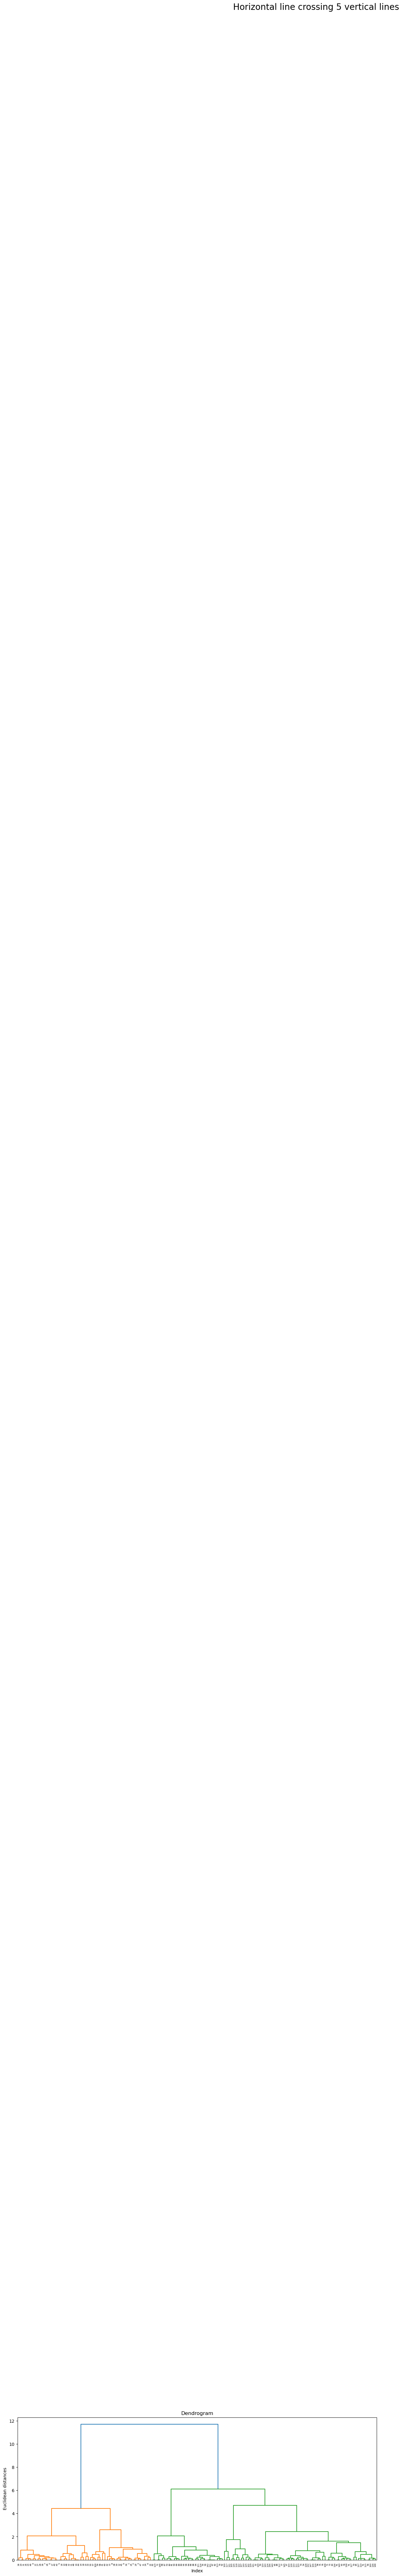

In [105]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

### AgglomerativeClustering

In [97]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


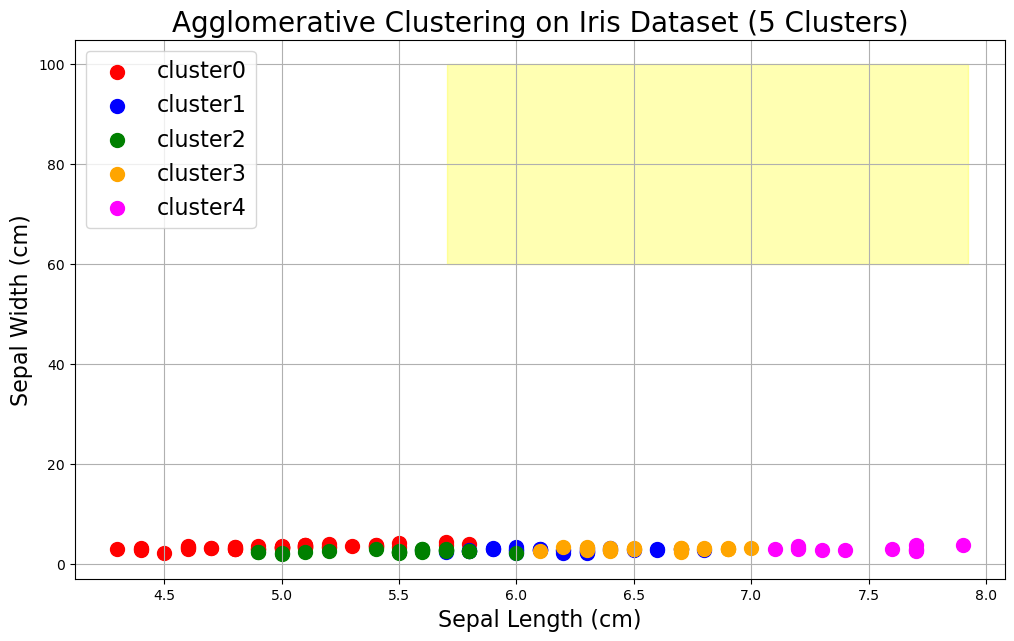

In [101]:
plt.figure(figsize=(12,7))
X = X.iloc[:, [0, 1]].values
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'cluster0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'cluster1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'cluster2')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'cluster3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'cluster4')
plt.title('Agglomerative Clustering on Iris Dataset (5 Clusters)',fontsize=20)
plt.xlabel('Sepal Length (cm)',fontsize=16)
plt.ylabel('Sepal Width (cm)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()